In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df_imputed = pd.read_csv('9.28data.csv')
df_cleaned = df_imputed.dropna()
print(df_cleaned)
df_imputed = df_cleaned

      Gender  Age  Race  Weight  Height    BMI  Retinopathy  HCV  DM  group
0          2   44     4    75.2   156.0  30.90            0    0   0      0
1          1   70     3    69.5   167.6  24.74            0    0   1      1
2          1   73     3   101.9   182.4  30.63            0    0   0      1
3          1   79     3    85.0   171.4  28.93            0    0   0      1
4          2   59     4    82.9   167.6  29.51            0    0   1      0
...      ...  ...   ...     ...     ...    ...          ...  ...  ..    ...
5359       1   48     3    90.6   173.9  29.96            0    0   0      0
5360       1   61     1    89.4   172.4  30.08            0    0   0      0
5361       2   50     3    72.2   159.7  28.31            0    0   0      1
5362       2   60     4    79.1   158.4  31.53            0    0   0      0
5363       1   72     3    85.2   162.5  32.27            0    0   0      1

[5364 rows x 10 columns]


In [3]:
feature_selected = {
    'Gender':'Gender',  
    'Age':'Age', 
    'Race':'Race',  
    'Weight':'Weight',  
    'Height':'Height',  
    'BMI':'BMI', 
    'Retinopathy':'Retinopathy', 
    'HCV':'HCV', 
    'T2DM':'DM',  
}

features = list(feature_selected.keys())

df_sl = df_imputed[feature_selected.values()]

df_sl.columns = features

df_sl

,Gender,Age,Race,Weight,Height,BMI,Retinopathy,HCV,T2DM
0,2,44,4,75.2,156.0,30.90,0,0,0
1,1,70,3,69.5,167.6,24.74,0,0,1
2,1,73,3,101.9,182.4,30.63,0,0,0
3,1,79,3,85.0,171.4,28.93,0,0,0
4,2,59,4,82.9,167.6,29.51,0,0,1
...,...,...,...,...,...,...,...,...,...
5359,1,48,3,90.6,173.9,29.96,0,0,0
5360,1,61,1,89.4,172.4,30.08,0,0,0
5361,2,50,3,72.2,159.7,28.31,0,0,0
5362,2,60,4,79.1,158.4,31.53,0,0,0


In [4]:
X_scaled = StandardScaler().fit_transform(df_sl) 

y = df_imputed['group']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=123)  

label_to_num = {'No/mild hepatic \n fibrosis': 0.0, 'Significant liver \n fibrosis/cirrhosis': 1.0}  

In [5]:
lr = LogisticRegressionCV(cv=10, random_state=123, n_jobs=-1).fit(X_train, y_train)  

In [6]:
y_pred = lr.predict(X_test)

target_names = ['No/mild hepatic \n fibrosis', 'Significant liver \n fibrosis/cirrhosis'] 

class_rep = classification_report(y_test, y_pred, target_names=target_names)

<Figure size 9600x7200 with 0 Axes>

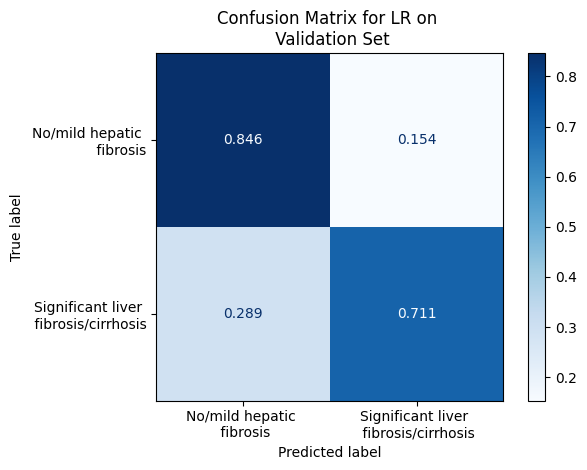

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='true')

dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

plt.figure(figsize=(8, 6), dpi=1200) 

dis.plot(cmap=plt.cm.Blues, values_format='.3f')

plt.title('Confusion Matrix for LR on \n Validation Set')

plt.ylabel('True label')

plt.tight_layout()

plt.savefig('confusion_matrix_lr_validation_set.pdf') 

plt.show()

In [8]:
y_train_pred = lr.predict(X_train)

target_names = ['No/mild hepatic \n fibrosis', 'Significant liver \n fibrosis/cirrhosis']  

class_rep_Train = classification_report(y_train, y_train_pred, target_names=target_names)

<Figure size 9600x7200 with 0 Axes>

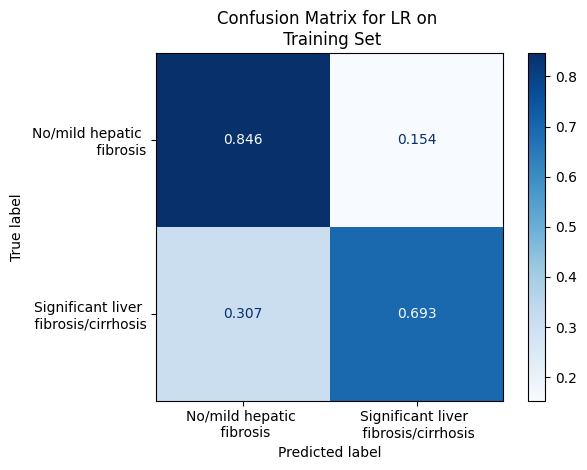

In [9]:
# 计算混淆矩阵
cm_train = confusion_matrix(y_train, y_train_pred, normalize='true')

# 生成混淆矩阵图的对象
dis_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=target_names)

# 绘制和保存混淆矩阵图
plt.figure(figsize=(8, 6), dpi=1200)
dis_train.plot(cmap=plt.cm.Blues, values_format='.3f')
plt.title('Confusion Matrix for LR on \n Training Set')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('confusion_matrix_lr_training_set.pdf')
plt.show()

In [8]:
import shap
X_test_df = pd.DataFrame(X_test, columns=feature_selected.keys())
X_test_df

,Gender,Age,Race,Weight,Height,BMI,Retinopathy,HCV,T2DM
0,1.004110,0.926696,0.125746,1.021031,-1.239210,2.100126,2.658226,-0.165497,-0.507621
1,-0.995907,1.491294,0.125746,-0.298192,-0.481125,-0.067753,-0.376191,-0.165497,1.969975
2,-0.995907,0.362099,2.109577,0.763138,1.064970,0.234634,-0.376191,-0.165497,-0.507621
3,-0.995907,0.442755,-1.858084,-0.139489,-0.122032,-0.080159,-0.376191,-0.165497,1.969975
4,-0.995907,-0.525126,1.117661,4.046319,1.394138,3.185616,2.658226,-0.165497,1.969975
...,...,...,...,...,...,...,...,...,...
1605,1.004110,0.846039,0.125746,-1.180981,-0.511049,-1.100519,-0.376191,-0.165497,-0.507621
1606,1.004110,-1.089724,0.125746,-0.298192,-0.680621,0.043897,-0.376191,-0.165497,-0.507621
1607,1.004110,0.765383,-1.858084,0.331662,-0.790344,0.882826,-0.376191,-0.165497,-0.507621
1608,1.004110,-0.847754,0.125746,1.422750,-0.650696,2.107879,2.658226,-0.165497,1.969975


In [9]:
explainer = shap.explainers.Linear(lr, X_test_df)
shap_values = explainer(X_test_df)

In [16]:
import matplotlib.pyplot as plt
import shap

fig = plt.figure(figsize=(8, 6), dpi=1200)  

plt.title("Beeswarm Plot for Feature Importance")

shap.plots.beeswarm(shap_values, max_display=20, show=False)

plt.yticks(fontsize=14)

plt.tight_layout()

fig.savefig('beeswarm_plot_feature_importance.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

plt.close(fig)

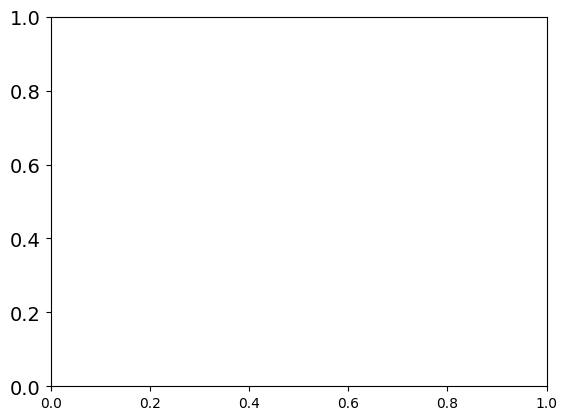

In [21]:
import shap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6), dpi=1200)  

plt.title("Feature Importance")

shap.plots.bar(shap_values[:, :, 0], max_display=20, show_data=True)

plt.yticks(fontsize=14)

fig.savefig("feature_importance.pdf", format="pdf", bbox_inches='tight', pad_inches=0.1)

plt.close(fig)

In [35]:
import matplotlib.pyplot as plt
import shap

plt.figure(dpi=1200)

plt.title("Heatmap")

shap.plots.heatmap(shap_values, max_display=20, show=False)

plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('shap_heatmap.pdf', format='pdf')  

plt.close()

In [37]:
import matplotlib.pyplot as plt
import shap

plt.figure(dpi=1200)

shap.plots.waterfall(shap_values[367], show=False)

plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('shap_waterfall.pdf')  

In [38]:
import matplotlib.pyplot as plt
import shap

plt.figure(dpi=1200)

shap.plots.waterfall(shap_values[1481], show=False)

plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('shap_waterfall_2.pdf')  